In [156]:
import os, copy
import sys
import numpy as np
import cv2
import imutils
from matplotlib import pyplot as plt
%matplotlib inline
sys.path.append("../")
from modules.GraphicsCV import draw_circle
# import math

### Helper Functions

In [186]:
def horizPlot(img1, img2):
    h,w = 1,2
    fig, ax = plt.subplots(h,w)
    fig.subplots_adjust(hspace=0.3)
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    fig.show()

In [157]:
#from ControlDisplay:Display
def rectToCircle(input_rect):
        rect = copy.copy(input_rect)            

        x = int( rect[0] + int(rect[2] / 2) )
        y = int( rect[1] + int(rect[3] / 2) )

        radius = min( int(rect[2] / 2), int(rect[3] / 2) )

        return (x, y, radius)

### Setup Test Images

(100, 120, 3)
(120, 100, 3)


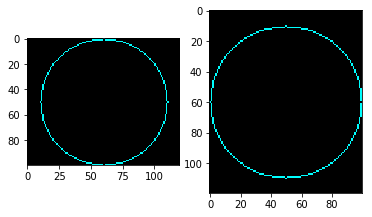

In [187]:
H,W = 100, 100 + 20
imgA = np.array(np.zeros(shape=(H,W,3)), dtype='uint8')
x,y,radius = rectToCircle([0,0,W,H])
imgA = draw_circle(imgA, x, y, radius,thick = 1, color = 'yellow')

H,W = 100 + 20, 100
imgB = np.array(np.zeros(shape=(H,W,3)), dtype='uint8')
x,y,radius = rectToCircle([0,0,W,H])
imgB = draw_circle(imgB, x, y, radius,thick = 1, color = 'yellow')

print imgA.shape
print imgB.shape

horizPlot(imgA, imgB)

In [138]:
def circle_xcoords(radius):
    ''' returns list of length radius, with each x coord on the unit circle line'''    
    list_x = []
    for y in range(1, radius + 1):
        list_x.append( (radius**2 - y**2)**(0.5) )
    return list_x

print map(int, circle_xcoords(R))    

[49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 47, 47, 47, 46, 46, 45, 45, 44, 44, 43, 43, 42, 42, 41, 40, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 28, 27, 25, 23, 21, 19, 17, 14, 9, 0]


60 50 50
50 60 50


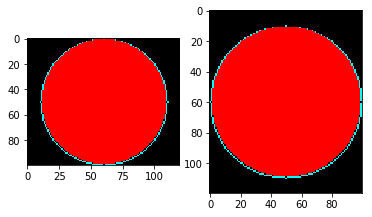

In [185]:
def draw_circle_pix(img):

    H, W = img.shape[0], img.shape[1]
    circle_x,circle_y,circle_radius = rectToCircle([0,0,W,H])
    print circle_x, circle_y, radius
    
    max_x = map(int, circle_xcoords(circle_radius)[::-1])
    max_x.extend(max_x[::-1])

    for y in range (0,H):
        for x in range(0,W):

            if (y <= circle_y - radius) or (y >= circle_y + radius):
                continue
            
            _y = y - (circle_y - radius) 
            
            if (x > circle_x - max_x[_y]) and (x < circle_x + max_x[_y]):

                img[y,x] = np.array([255,0,0] ,dtype=np.uint8)
    
    return img

_imgA, _imgB = imgA.copy(), imgB.copy()

red_imgA = draw_circle_pix(_imgA)
red_imgB = draw_circle_pix(_imgB)

horizPlot(red_imgA, red_imgB)

### Build a function to grab pixels from inside/outside the circle

In [194]:
def filter_pixels_circle(img, b_inside=True):
    
    pix_list = []
    
    #make circle based on img-shape:
    circle_x = int( img.shape[1] / 2)
    circle_y = int( img.shape[0] / 2)
    radius = min( int(img.shape[1] / 2), int(img.shape[0] / 2) )    
    
    #build the x_coords frontier contour
    x_coords = map(int, circle_xcoords(radius)[::-1])
    x_coords.extend(x_coords[::-1])
    
    #filter loop
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            
            if (y <= circle_y - radius) or (y >= circle_y + radius):
                if not(b_inside):
                    pix_list.append(img[y,x])
                else:
                    continue
            
            _y = y - (circle_y - radius) 
                
            if (x > circle_x - x_coords[_y]) and (x < circle_x + x_coords[_y]):
                if b_inside:
                    pix_list.append(img[y,x])
            else:
                if not(b_inside):
                    pix_list.append(img[y,x])
    
    return pix_list

In [195]:
pix_list_A = filter_pixels_circle(imgA)
pix_list_B = filter_pixels_circle(imgB)
print float(len(pix_list_A)) / float((R*2)**2)
print float(len(pix_list_B)) / float((R*2)**2)
print 3.14 / 4.0

0.7546
0.7546
0.785


### Convert a pix_list to a pseduo-img that can be applied to cv2.split

In [147]:
cam = cv2.VideoCapture("../data/proc/hello-training-data/output4.avi")
ret, frame = cam.read()
# img = frame.copy()

In [148]:
out = cv2.split(img)
print len(out)   #should be 3, for the 3 colors

3


In [149]:
# How to convert a list of pixels to a psedu-image format that can be consumed
# by the img argument in iterThreshA; img is simply cv2.split(img) so that needs to work

print frame.shape

print ''
pix_list = [frame[0][0]]
pix_list.append(frame[0][1])
print 'pix_list: ', pix_list

print ''
np_pix_list = np.array(pix_list, dtype='uint8')
print 'np_pix_list: ', np_pix_list
print np_pix_list.shape
out2 = cv2.split(np_pix_list)
print 'should be len3 but is len: ', str(len(out2))

print ''
np_np_pix_list = np.array(np_pix_list, dtype='uint8', ndmin = 3)
print 'np_np_pix_list: ', np_np_pix_list
print np_np_pix_list.shape
out3 = cv2.split(np_np_pix_list)
print 'it is len 3, see: ', str(len(out3))

print ''
print 'it is appropiately split between the 3 colors:'
out3

(480, 640, 3)

pix_list:  [array([144, 149, 149], dtype=uint8), array([144, 149, 149], dtype=uint8)]

np_pix_list:  [[144 149 149]
 [144 149 149]]
(2, 3)
should be len3 but is len:  1

np_np_pix_list:  [[[144 149 149]
  [144 149 149]]]
(1, 2, 3)
it is len 3, see:  3

it is appropiately split between the 3 colors:


[array([[144, 144]], dtype=uint8),
 array([[149, 149]], dtype=uint8),
 array([[149, 149]], dtype=uint8)]